In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

########首先，让我们建立回归模型：
########城市人口率 = β0 + β1国内生产总值 + β2失业率 + β3房租率 + β4生产率 + ε
########根据模型结果，我们可以讨论疫情时期与非疫情时期影响人口流动的因素及其重要程度：
########经济因素（国内生产总值和生产率）：
########非疫情时期：这些因素通常对人口流动有正面影响。经济发达地区往往吸引更多人口。
########疫情时期：经济因素的影响可能减弱，因为健康和安全考虑可能超过经济机会。
########失业率：
########非疫情时期：高失业率可能导致人口外流。
########疫情时期：失业率的影响可能更加复杂。一方面，高失业率可能促使人们寻找新的机会；另一方面，整体经济不确定性可能减少人口流动。
########房租率：
########非疫情时期：高房租可能抑制人口流入。
########疫情时期：房租的影响可能减弱，因为远程工作的增加使得人们可能选择较低生活成本的地区。
########其他疫情相关因素（模型中未包含）：
########医疗资源：疫情期间，医疗资源丰富的地区可能更具吸引力。
########疫情控制效果：管控得当的地区可能吸引更多人口。
########产业结构：能够支持远程工作的产业结构可能在疫情期间更有优势。
########政策因素：
########非疫情时期：户籍政策、人才政策等影响人口流动。
########疫情时期：防疫政策、旅行限制等成为影响人口流动的关键因素。
########重要程度：
########疫情时期：防疫政策 > 医疗资源 > 经济因素 > 失业率 > 房租率
########非疫情时期：经济因素 > 失业率 > 房租率 > 政策因素
########结论：
########疫情显著改变了影响人口流动的因素优先级。健康和安全考虑在疫情期间变得更加重要，而经济因素的影响相对减弱。同时，疫情也可能加速了某些长期趋势，如远程工作的普及，这可能导致人口流动模式的永久性变化。
########为了更准确地分析疫情对人口流动的影响



In [66]:
# 读取数据
data = pd.read_csv('./dataset/2019-疫情.csv',  encoding='gbk')

# 数据预处理
X = data[['GDP2020', 'unemployment rate 2020', 'rental price 2020', 'production index 2020']]
y = data['migration population index 2020']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# 建立线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

In [67]:

# 模型评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean squared error: {mse}')
print(f'R-squared score: {r2}')


Mean squared error: 12.796573679434447
R-squared score: -0.8108623950570548


In [68]:
# 使用statsmodels进行更详细的统计分析
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

                                   OLS Regression Results                                  
Dep. Variable:     migration population index 2020   R-squared:                       0.280
Model:                                         OLS   Adj. R-squared:                  0.169
Method:                              Least Squares   F-statistic:                     2.523
Date:                             Sat, 10 Aug 2024   Prob (F-statistic):             0.0652
Time:                                     16:13:10   Log-Likelihood:                -65.517
No. Observations:                               31   AIC:                             141.0
Df Residuals:                                   26   BIC:                             148.2
Df Model:                                        4                                         
Covariance Type:                         nonrobust                                         
                             coef    std err          t      P>|t|      [0.025  

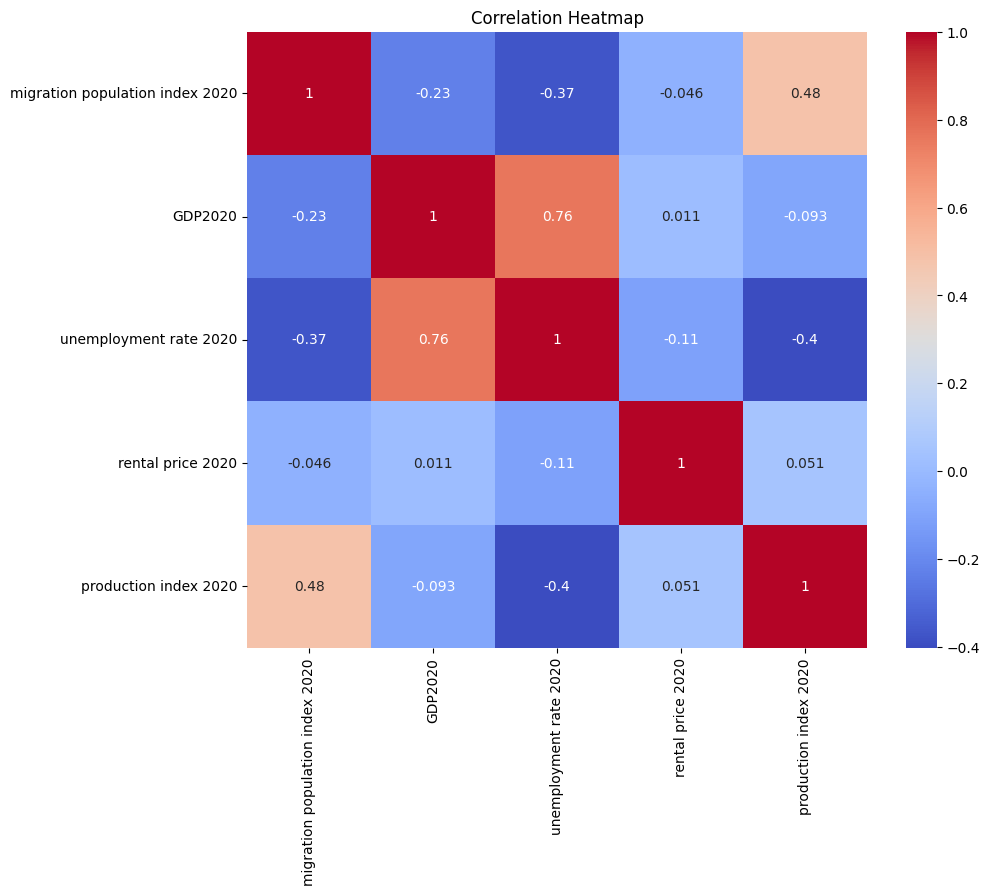

In [69]:
# 可视化相关性
plt.figure(figsize=(10, 8))
sns.heatmap(data[['migration population index 2020', 'GDP2020', 'unemployment rate 2020', 'rental price 2020', 'production index 2020']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

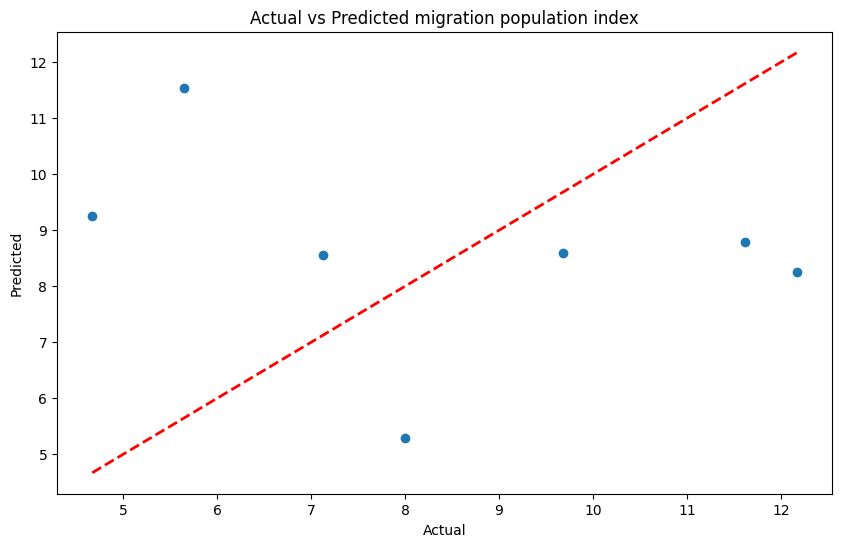

In [70]:
# 可视化预测结果
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted migration population index')
plt.show()


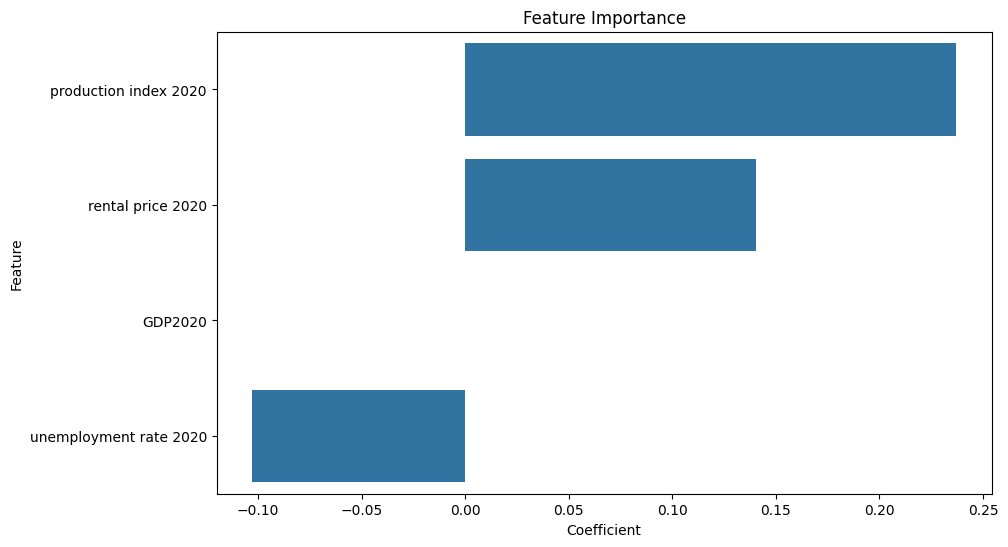

In [71]:
# 分析各因素的影响
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values('Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance')
plt.show()
